# 로지스틱 회귀(Logistic Regression) - 이진 분류

- 일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많습니다. 
- 예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇습니다. 
- 이렇게 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 합니다. 
- 그리고 이런 문제를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있습니다.

## 1. 이진 분류(Binary Classification)

- 선형 회귀에서 공부 시간과 성적 간의 관계를 직선의 방정식으로 표현한다는 가설 하에, 주어진 데이터로부터 가중치 W(weight)와 편향 b(bias)를 찾아 데이터를 가장 잘 표현하는 직선을 찾았습니다.
- 둘 중 하나의 선택지 중에서 정답을 고르는 이진 분류 문제는 직선으로 표현하는 것이 적절하지 않습니다.


- 학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해봅시다. 
- 시험 성적이 x라면, 합불 결과는 y입니다. 이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 합시다.

|score(x)|result(y)|
|---:|---:|
|45|불합격|
|50|불합격|
|55|불합격|
|60|합격|
|65|합격|
|70|합격|

- 의 데이터에서 합격을 1, 불합격을 0이라고 하였을 때 그래프를 그려보면 아래와 같습니다.

![Alt text]( LogisticRegression.png )

- 이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현됩니다. 
- 이러한 x와 y의 관계를 표현하기 위해서는 직선을 표현하는 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요합니다. 
- 직선을 사용할 경우 보통 분류 작업이 제대로 동작하지 않습니다.


- 또한 이번 예제의 경우 실제값 y가 0 또는 1이라는 두 가지 값밖에 가지지 않으므로, 이 문제를 풀기 위해서는 예측값이 0과 1사이의 값을 가지도록 하는 것이 보편적입니다. 
- 0과 1사이의 값을 확률로 해석하면 문제를 풀기가 훨씬 용이해집니다. 
- 최종 예측값이 0.5보다 작으면 0으로 예측했다고 판단하고, 0.5보다 크면 1로 예측했다고 판단할 수 있기 때문입니다. 
- 하지만 선형 회귀의 경우 y값이 음의 무한대부터 양의 무한대와 같은 큰 수들도 가질 수 있는데 이는 분류 문제에 적합하지 않은 두번째 이유입니다.

- 0과 1사이의 값을 가지면서, S자 형태로 그려지는 조건을 충족하는 함수가 있습니다. 바로 시그모이드 함수(Sigmoid function)입니다.

## 2. 시그모이드 함수(Sigmoid function)

- 이 문제에서 사용하게 될 시그모이드 함수의 방정식은 아래와 같습니다. 종종 σ로 축약해서 표현하기도 합니다. 이는 위의 문제를 풀기 위한 가설(Hypothesis)식이기도 합니다.

\begin{equation*}
    H( X ) = \frac{1}{1+e^-(WX+b)} = sigmoid( WX + b ) = \alpha( WX + b )
\end{equation*}

- 여기서 e(e=2.718281...)는 자연 상수입니다. 여기서 구해야할 것은 여전히 주어진 데이터에 가장 적합한 가중치 W(weight)와 편향 b(bias)입니다. 인공 지능 알고리즘이 하는 것은 결국 주어진 데이터에 적합한 가중치 W와 b를 구하는 것입니다.

In [1]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

- 아래의 그래프는 W는 1, b는 0임을 가정한 그래프입니다.

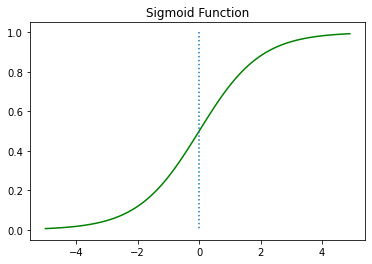

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- 위의 그래프를 통해 알 수 있는 것은 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환합니다. 마치 S자의 모양을 연상시킵니다. 
- x가 0일 때 0.5의 값을 가집니다. x가 증가하면 1에 수렴합니다. 
- 여기서 구해야 할 가중치 W와 편향 b가 어떤 의미를 가지는지 한 번 그래프를 통해 알아보겠습니다. 
- 우선 W의 값을 변화시키고 이에 따른 그래프를 확인해보겠습니다.

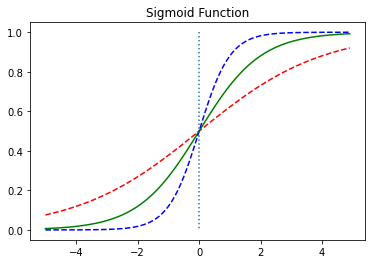

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- 위의 그래프는 W의 값이 0.5일때 빨간색선, W의 값이 1일때는 초록색선, W의 값이 2일때 파란색선이 나오도록 하였습니다. 
- 자세히 보면 W의 값에 따라 그래프의 경사도가 변하는 것을 볼 수 있습니다. 
- 앞서 선형 회귀에서 가중치 W는 직선의 기울기를 의미했지만, 여기서는 그래프의 경사도를 결정합니다. 
- W의 값이 커지면 경사가 커지고 W의 값이 작아지면 경사가 작아집니다.

- 이제 b의 값에 따라서 그래프가 어떻게 변하는지 확인해보도록 하겠습니다.

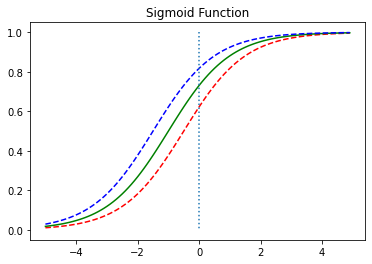

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- 위의 그래프는 b의 값에 따라서 그래프가 이동하는 것을 보여줍니다. 


- 시그모이드 함수는 입력값이 커지면 1에 수렴하고, 입력값이 작아지면 0에 수렴합니다. 
- 0부터의 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)로 만들면 이진 분류 문제로 사용할 수 있습니다. 
- 이를 확률이라고 생각하면 해당 범주에 속할 확률이 50%가 넘으면, 해당 범주라고 판단하고 50%보다 낮으면 아니라고 판단한다고도 볼 수 있습니다.

## 3. 비용 함수(Cost function)

- 로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 W를 찾아내지만, 비용 함수로는 평균 제곱 오차를 사용하지 않습니다. 
- 그 이유는 시그모이드 함수에 비용 함수를 평균 제곱 오차로 하여 그래프를 그리면 다음과 비슷한 형태가 되기 때문입니다.

![Alt text]( localmimum.png )

- 로지스틱 회귀에서 평균 제곱 오차를 비용 함수로 사용하면, 경사 하강법을 사용하였을때 자칫 잘못하면 찾고자 하는 최소값이 아닌 잘못된 최소값에 빠집니다. 
- 이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)에 도달했다고 합니다. 
- 이는 cost가 최소가 되는 가중치 W를 찾는다는 비용 함수의 목적에 맞지 않습니다.


- 그렇다면 가중치 W를 최소로 만드는 새로운 비용 함수를 찾아야 합니다. 
- 가중치를 최소화하는 아래의 어떤 함수를 목적 함수라고 합시다. 
- 비용 함수와 목적 함수를 최적의 가중치를 찾기 위해 함수의 값을 최소화하는 함수라는 의미에서 같은 의미의 용어로 사용합니다. 
- J는 목적 함수(objective function)를 의미합니다.

\begin{equation*}
    J( W ) = \frac{1}{n}\sum_{i=1}^nf(H(x^{(i)}),y^{(i)})
\end{equation*}

- 위의 식은 완성되지 않았습니다. 
- 위의 식에서 샘플 데이터의 개수가 n개이고, 어떤 함수 f가 실제값 yi와 예측값 H(xi)의 오차를 나타내는 함수라고 할 때, 여기서 새로운 함수 f를 어떻게 정의하느냐에 따라서 가중치를 최소화하는 적절한 목적 함수가 완성됩니다. 
- 목적 함수는 전체 데이터에 대해서 어떤 함수 f의 값의 평균을 계산하고 있습니다. 
- 적절한 가중치를 찾기 위해서는 결과적으로 실제값과 예측값에 대한 오차를 줄여야 하므로 여기서 이 f는 비용 함수(cost function)라고 하겠습니다. 식을 다시 쓰면 아래와 같습니다.

\begin{equation*}
    J( W ) = \frac{1}{n}\sum_{i=1}^ncost(H(x^{(i)}),y^{(i)})
\end{equation*}

- 시그모이드 함수는 0과 1사이의 y값을 반환합니다. 
- 이는 실제값이 0일 때 y값이 1에 가까워지면 오차가 커지며 실제값이 1일 때 y값이 0에 가까워지면 오차가 커짐을 의미합니다. 그리고 이를 반영할 수 있는 함수는 로그 함수를 통해 표현이 가능합니다.

\begin{equation*}
    if y = 1 \rightarrow cost(H(X),y) = -\log(H(X))
\end{equation*}

\begin{equation*}
    if y = 0 \rightarrow cost(H(X),y) = -\log(1-H(X))
\end{equation*}

- y의 실제값이 1일 때 −logH(x) 그래프를 사용하고 y의 실제값이 0일 때 −log(1−H(X)) 그래프를 사용해야 합니다. 위의 두 식을 그래프 상으로 표현하면 아래와 같습니다.

![Alt text]( loss_function.png )

- 실제값이 1일 때의 그래프를 파란색 선으로 표현하였으며, 실제값이 0일 때의 그래프를 빨간색 선으로 표현하였습니다. 
- 위의 그래프를 간략히 설명하면, 실제값이 1일 때, 예측값인 H(X)의 값이 1이면 오차가 0이므로 당연히 cost는 0이 됩니다. 
- 반면, 실제값이 1일 때, H(X)가 0으로 수렴하면 cost는 무한대로 발산합니다. 실제값이 0인 경우는 그 반대로 이해하면 됩니다. 이는 다음과 같이 하나의 식으로 표현할 수 있습니다.

\begin{equation*}
    cost( H(X),y ) = -[ y \log H(X) + ( 1 - y )\log ( 1 - H(X) ) ]
\end{equation*}

- 자세히 보면 y와 (1−y)가 식 중간에 들어갔고, 두 개의 식을 -로 묶은 것 외에는 기존의 두 식이 들어가있는 것을 볼 수 있습니다. 
- y가 0이면 ylogH(X)가 없어지고, y가 1이면 (1−y)log(1−H(X))가 없어지는데 이는 각각 y가 1일 때와 y가 0일 때의 앞서 본 식과 동일합니다.

- 결과적으로 로지스틱 회귀의 목적 함수는 아래와 같습니다.

\begin{equation*}
    J( W ) = -\frac{1}{n}\sum_{i=1}^n[y^{(i)} \log H(X^{(i)})) + ( 1 - y^{(i)}) )\log ( 1 - H(X^{(i)})) ) ]
\end{equation*}

- 이때 로지스틱 회귀에서 찾아낸 비용 함수를 크로스 엔트로피(Cross Entropy)함수라고 합니다. 
- 즉, 결론적으로 로지스틱 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하며, 가중치를 찾기 위해서 크로스 엔트로피 함수의 평균을 취한 함수를 사용합니다. 
- 크로스 엔트로피 함수는 소프트맥스 회귀의 비용 함수이기도 하다.

In [5]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [7]:
X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
history = model.fit(X,y, batch_size=1, epochs=200, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Train on 13 samples
Epoch 1/200
13/13 [==============================] - 0s 25ms/sample - loss: 0.3161 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2982 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2812 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.2652 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2503 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2369 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2251 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.2151 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.2068 - binary_accuracy: 0.9231
Epoch 1

13/13 [==============================] - 0s 2ms/sample - loss: 0.1291 - binary_accuracy: 0.9231
Epoch 77/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1286 - binary_accuracy: 0.9231
Epoch 78/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1280 - binary_accuracy: 0.9231
Epoch 79/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1274 - binary_accuracy: 0.9231
Epoch 80/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1269 - binary_accuracy: 0.9231
Epoch 81/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1263 - binary_accuracy: 0.9231
Epoch 82/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1258 - binary_accuracy: 0.9231
Epoch 83/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1253 - binary_accuracy: 0.9231
Epoch 84/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1247 - binary_accuracy: 0.9231
Epoch 85/200
13/13 [============

- 임의의 숫자들의 나열을 X라고 하였을 때, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y라고 해봅시다. 
- 이번 데이터는 앞서 배운 단순 선형 회귀때와 마찬가지로 1개의 실수인 X로부터 1개의 실수인 y를 예측하는 맵핑 관계를 가지므로 각각 1을 기재합니다. 또한 시그모이드 함수를 사용할 것이므로 activation에 sigmoid를 기재해줍니다.

- 옵티마이저로는 경사 하강법의 일종인 확률적 경사 하강법을 사용하였으며, 손실 함수로는 크로스 엔트로피 함수를 사용합니다. 
- 이진 분류 문제에 크로스 엔트로피 함수를 사용할 경우에는 binary_crossentropy를 기재해주면 됩니다. 
- 전체 데이터에 대한 훈련 횟수는 200으로 합니다.


- 총 200회에 걸쳐 전체 데이터에 대한 오차를 최소화하는 W와 b를 찾아내는 작업을 합니다. 약 190회부터 정확도가 100%가 나오기 시작했습니다. 실제값과 오차를 최소화하는 W와 b의 값을 가진 시그모이드 함수 그래프를 그려보겠습니다.

In [9]:
history_dict = history.history
loss = history_dict[ 'loss' ]
#val_loss = history_dict[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

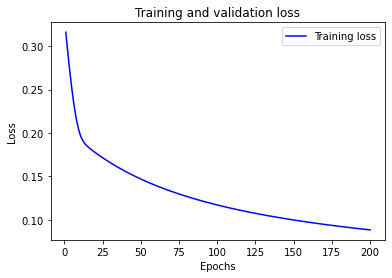

In [14]:
plt.plot( epochs, loss, 'b', label = 'Training loss' ) # 'bo' 파란색 점
#plt.plot( epochs, val_loss, 'b', label = 'Training loss' ) # 'bo' 파란색 실선
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

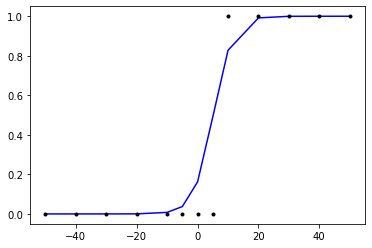

In [8]:
plt.plot(X, model.predict(X), 'b', X, y, 'k.')

- X 값이 5와 10사이의 어떤 값일때 y값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 X값이 5일때는 y값이 0.5보다 작고, X값이 10일 때는 y값이 0.5를 넘을 것입니다. 이제 X값이 5보다 작은 값일 때와 X값이 10보다 클 때에 대해서 y값을 출력해봅시다.

In [12]:
print(model.predict([1, 2, 3, 4, 4.5]))

[[0.21092829]
 [0.26931354]
 [0.33695856]
 [0.41201377]
 [0.4513961 ]]


In [13]:
print(model.predict([11, 21, 31, 41, 500]))

[[0.8690936 ]
 [0.9939718 ]
 [0.99975586]
 [0.99999017]
 [1.        ]]
